In [148]:
# Import packages

# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Finance related operations
from pandas_datareader import data as pdf
import yfinance as yfin

# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import pandas_datareader as data
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Problem Statement

Predicting the movements of stocks over time based on various financial and economic indicators is a common task in the field of finance and investment --- investors and traders rely on these predictions to assess when to buy, sell, and hold stocks, and also to gain a competitive edge in the markets and maximize returns while managing risk. However, predicting the movement of stocks is not an easy task, as prices are constantly fluctuating based on many complex factors like economic indicators, corporate earnings reports, geopolitical events, and market sentiment. In this project, our objective is to understand the relationship between various financial indicators and the increase or decrease in value of a stock. 

The key research questions guiding our project include:
- Which financial indicators are the best predictors of stock price/stock price increase or decrease?
- What type of model can best use financial indicators to classify the increase or decrease of a stock?
- Can we predict whether or not a stock can outperform the market given financial indicators? 

The data we will use is the 2018 data from this Kaggle dataset: ‘200+ Financial Indicators of U.S. stocks (2014-2018)’: https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv

We will first conduct some exploratory data analysis of this dataset before proceeding with the models.

# Summary of the Data

First, we load the data as a pandas dataframe and drop rows with no information. We find that the data has 4392 samples and 224 columns. Of these, 222 are numeric, 1 is an int type, and 1 is an object type.

These are:
- 222 numeric: financial indicators
- 1 integer: class column
- 1 object: categorical name of the sector

In [90]:
# Create a pandas DF of the data, making sure that the stock ticker is the index of the dataframe
df = pd.read_csv('data/2018_Financial_Data.csv', index_col=0)

# Drop rows with no information
df.dropna(how='all', inplace=True)

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, CMCSA to ZYME
Columns: 224 entries, Revenue to Class
dtypes: float64(222), int64(1), object(1)
memory usage: 7.5+ MB


In [91]:
# Shape of dataset
print(df.shape)

(4392, 224)


In [92]:
print("Features of the dataset and their data types:")
print(df.dtypes)

Features of the dataset and their data types:
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
R&D Expenses            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2019 PRICE VAR [%]      float64
Class                     int64
Length: 224, dtype: object


In [93]:
# Describe dataset variables
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


Basic info about the data:
- 4392 samples
- 225 columns
    - 222 float64: financial indicators
    - 1 int64: class column
    - 2 object: categorial (Sector, Unnamed: 0)

# Deeper Understanding of the Data

Then, we create bar graphs for the class counts and the sector counts, and histograms for the % price variation in total and also by sector.
Here is what we found:

- The % Price Var mainly centers around 0, which shows that most stocks do not significantly increase or decrease. This may tell us that the classification problem in this case may be a better problem to pursue than predicting the actual value of the stock variation.
- When plotting the % Price Var by sector, we see that all sectors generally center around 0, which follows the overall trend. However, real estate and utilities are the only sectors where the $ price variation doesn't center around 0, which may indicate that being in those sectors is correlated with positive % price variation.
- The samples are not balanced in terms of class. This is very important and should be accounted for when splitting the data between the training and testing data. We have approximately 3000 stocks of class count 1 (they are buy-worthy stocks that had a positive annual return), and just under 1500 of class count 0 (they are not buy-worthy stocks as they had a negative. annual return).
- The sectors are not equally represented in the data. There are 5 sectors with 500+ stocks and the remanining 6 have less than 300 stocks. Of these, 2 have less than 100 stocks. This should be kept in mind as we choose our model.

We then try to find errors in the data by plotting the annual price variation of each stock in a sector along a graph. Very high values can be errors in data entry or simply inorganic growth in returns. We found that these sectors had at least one stock with over ~500% returns, and likely are not realistic: Consumer Cyclical, Technology, Industrials, Consumer Defensive, and Healthcare. Note that this choice was arbitrary.

There were a total of 8 stocks under this category. For each one, we plotted the daily close value for the year along witht he volume. This helps us find out if the gains are organic or are due to an error. We find that of those, DRIO seems to not be organic as the price jumps x8 very quickly, then doubles yet again within a month. We dropped this stock from the data. We also drop the 4 stocks that have been delisted from the data.

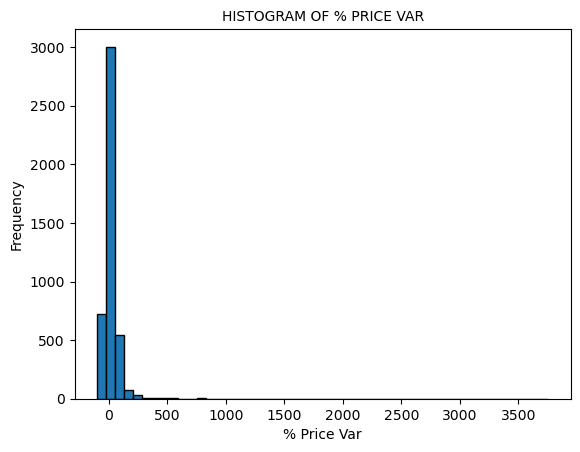

In [94]:
# Plot price variation distribution
plt.hist(df['2019 PRICE VAR [%]'], bins=50, edgecolor='black')
plt.title('HISTOGRAM OF % PRICE VAR', fontsize=10)
plt.xlabel('% Price Var')
plt.ylabel('Frequency')
plt.show()

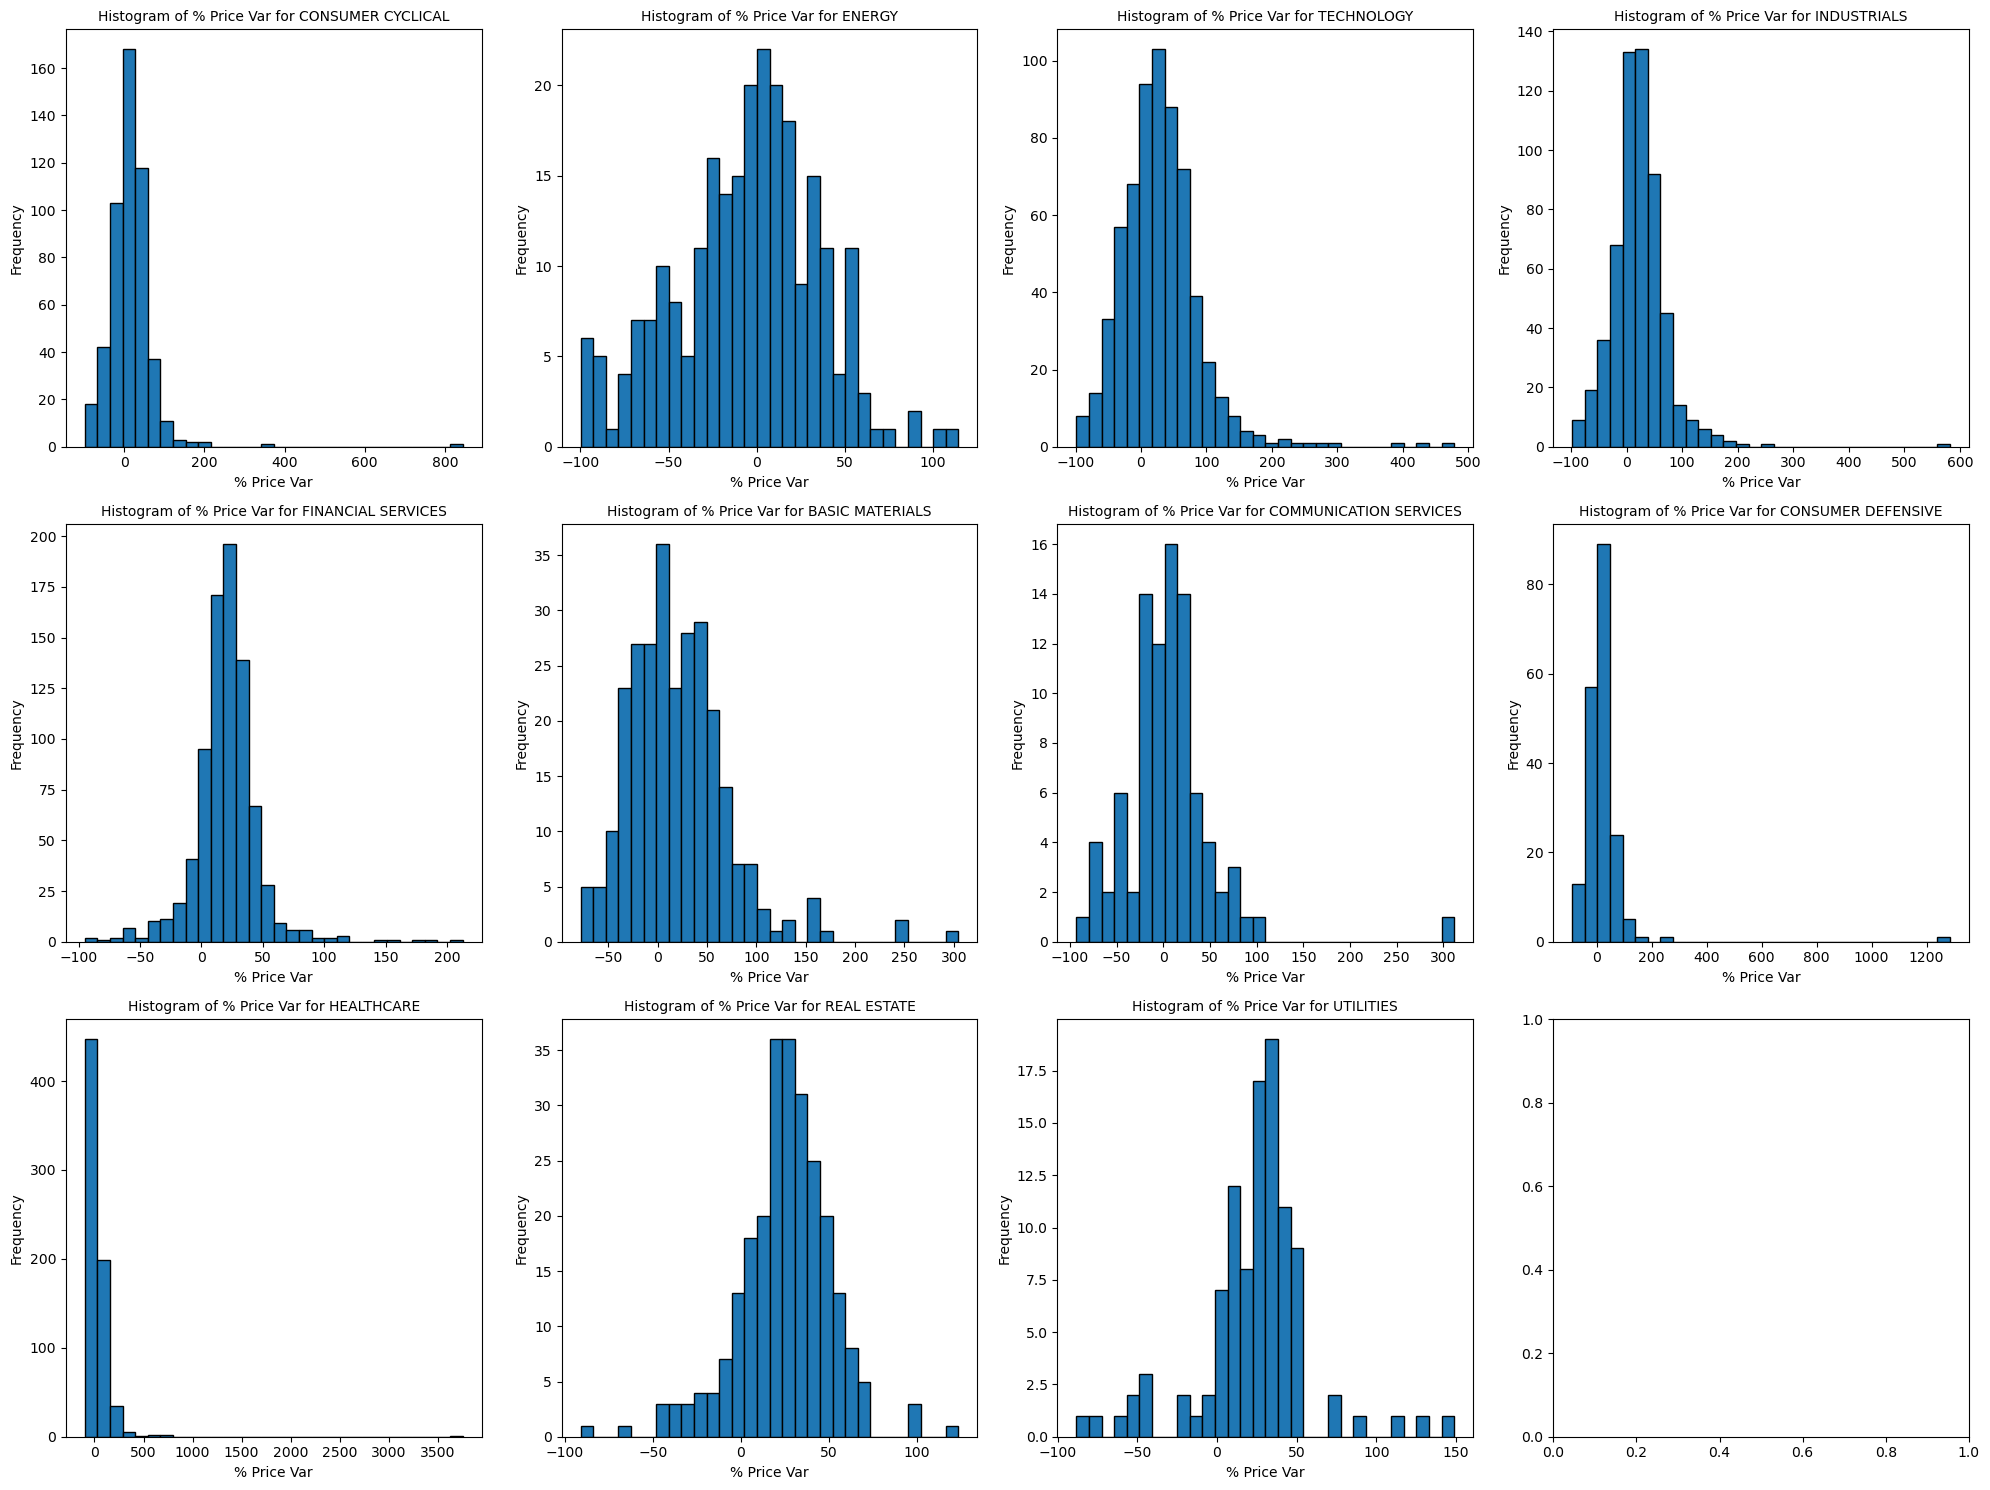

In [95]:
# Extract the columns we need in this step from the dataframe
df_ = df.loc[:, ['Sector', '2019 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Create a 3x4 grid for the histograms
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.ravel()

# Plot the histogram of percent price variation for each sector
for i, sector in enumerate(sector_list):

    temp = df_[df_['Sector'] == sector]

    axs[i].hist(temp['2019 PRICE VAR [%]'], bins=30, edgecolor='black')
    axs[i].set_title('Histogram of % Price Var for ' + sector.upper(), fontsize=10)
    axs[i].set_xlabel('% Price Var')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


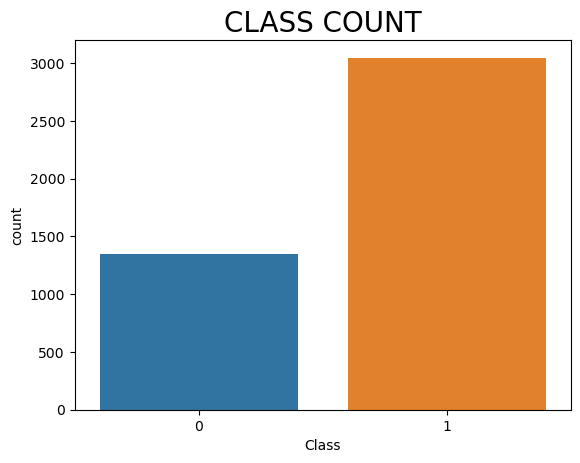

/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


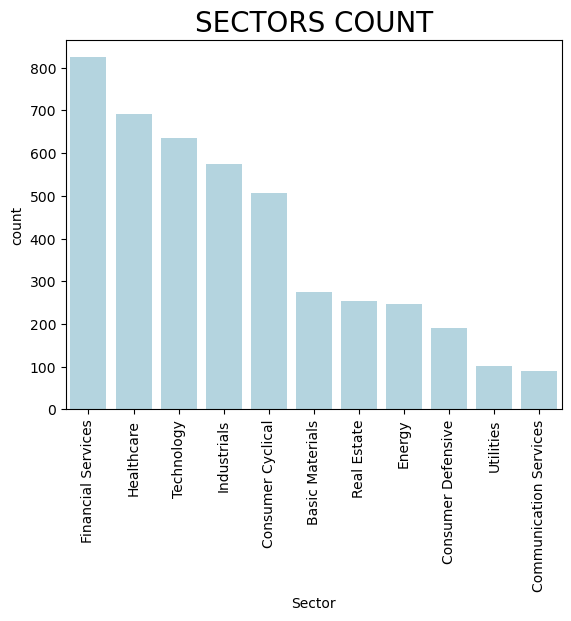

In [96]:
# Plot class distribution
df_class = df['Class'].value_counts()
sns.barplot(x=df_class.index, y=df_class)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df_sector = df['Sector'].value_counts()
sns.barplot(x=df_sector.index, y=df_sector, color='lightblue')
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

8 STOCKS with more than 500% gain.
[*********************100%%**********************]  1 of 1 completed


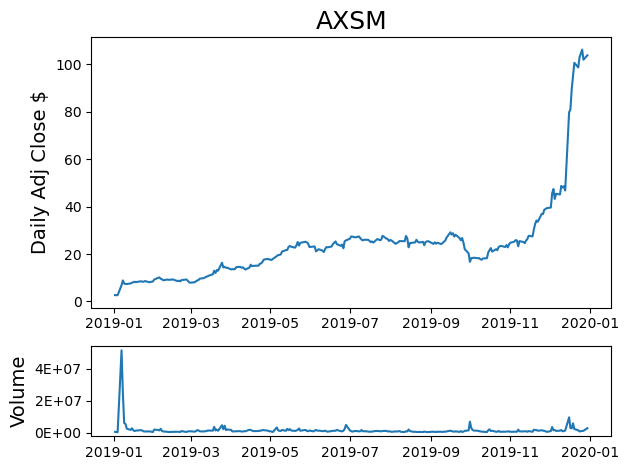

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ANFI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data not available for ANFI. Skipping plot.
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SSI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data not available for SSI. Skipping plot.
[*********************100%%**********************]  1 of 1 completed


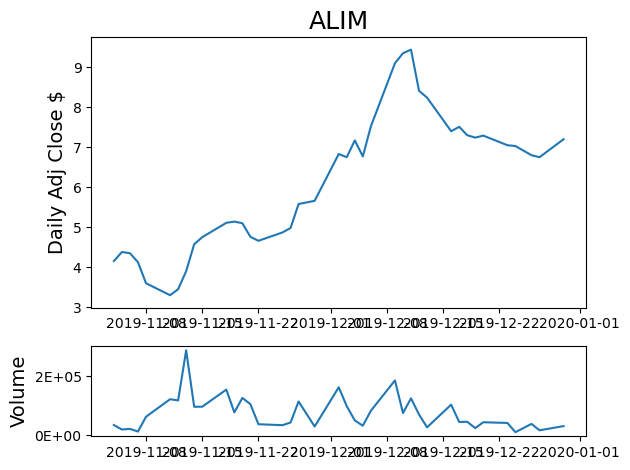

[*********************100%%**********************]  1 of 1 completed


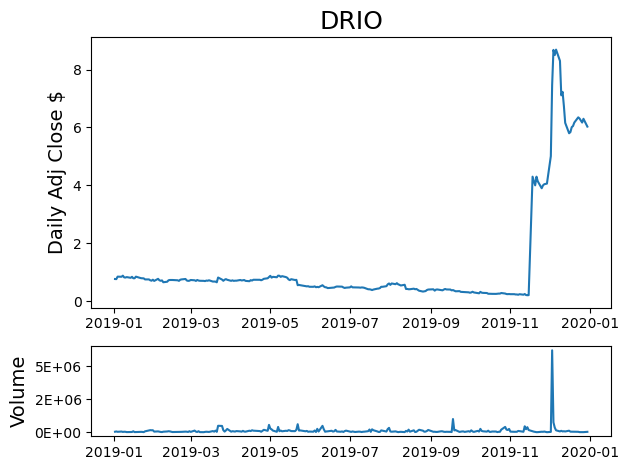

[*********************100%%**********************]  1 of 1 completed


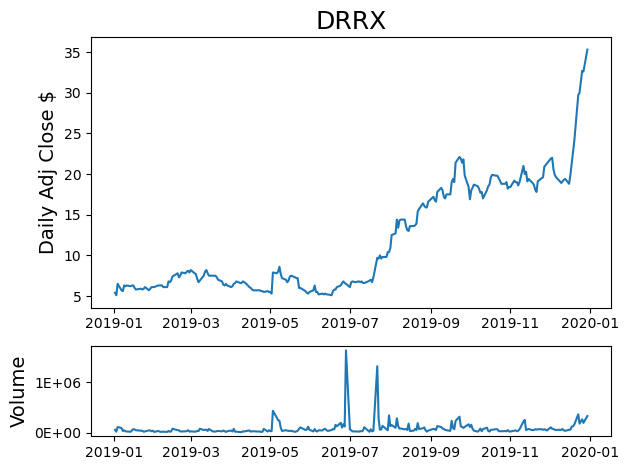

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARQL']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data not available for ARQL. Skipping plot.
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEBT']: Exception('%ticker%: No timezone found, symbol may be delisted')



Data not available for HEBT. Skipping plot.


In [97]:
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2019 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2019 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')

# Set
date_start = '2019-01-01'
date_end = '2019-12-31'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    try:

        yfin.pdr_override()
        # Pull daily prices for each ticker from Yahoo Finance
        daily_price = pdf.get_data_yahoo(ticker, start=date_start, end=date_end)

        # Check if data download was successful
        if not daily_price.empty:
            # Plot prices with volume
            fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

            ax0.plot(daily_price['Adj Close'])
            ax0.set_title(ticker, fontsize=18)
            ax0.set_ylabel('Daily Adj Close $', fontsize=14)
            ax1.plot(daily_price['Volume'])
            ax1.set_ylabel('Volume', fontsize=14)
            ax1.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

            fig.align_ylabels(ax1)
            fig.tight_layout()
            plt.show()
        else:
            print(f"Data not available for {ticker}. Skipping plot.")

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")


In [98]:
delisted_stocks = ['ANFI', 'SSI', 'ARQL', 'HEBT']
df_ = df_.drop(delisted_stocks + ['DRIO'], errors='ignore')

# Missing Values

After doing a quick check for missing values, we found that there were a lot of variables with a lot of missing values or 0 values. We plotted this as a percentage and filtered through predictors using this method.

We used an ~6% nan and zeros dominance treshhold to drop columns (so that each feature is at most ~6% nan values and at most ~6% zero values). This resulted in dropping the top 50% nan-dominant financial indicators, and the top 40% zero-dominant financial indicators. This resulted in 70 remaining predictors of the 224.

Then, we deleted the top 3 and bottom 3 percentiles of the data in order to account for outliers.

Finally, we imputed missing values with the mean of the column's sector, given the underlying characteristics of the stocks in each sector. This should not have a large impact on our analysis since this was only ~6% of all data in the columns.

In [99]:
missing_values = df.isnull().sum()

missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})

missing_df = missing_df.sort_values(by='Missing Values', ascending=False)

print(missing_df)

                                         Column  Missing Values
112                         cashConversionCycle            4386
110                              operatingCycle            4386
127                     shortTermCoverageRatios            1926
208  10Y Shareholders Equity Growth (per Share)            1695
82                   priceEarningsToGrowthRatio            1658
..                                          ...             ...
54                  Retained earnings (deficit)              21
70                          Financing Cash Flow              19
221                                      Sector               0
222                          2019 PRICE VAR [%]               0
223                                       Class               0

[224 rows x 2 columns]


In [100]:
missing_df.to_csv('missing_values_report.txt', index=False)

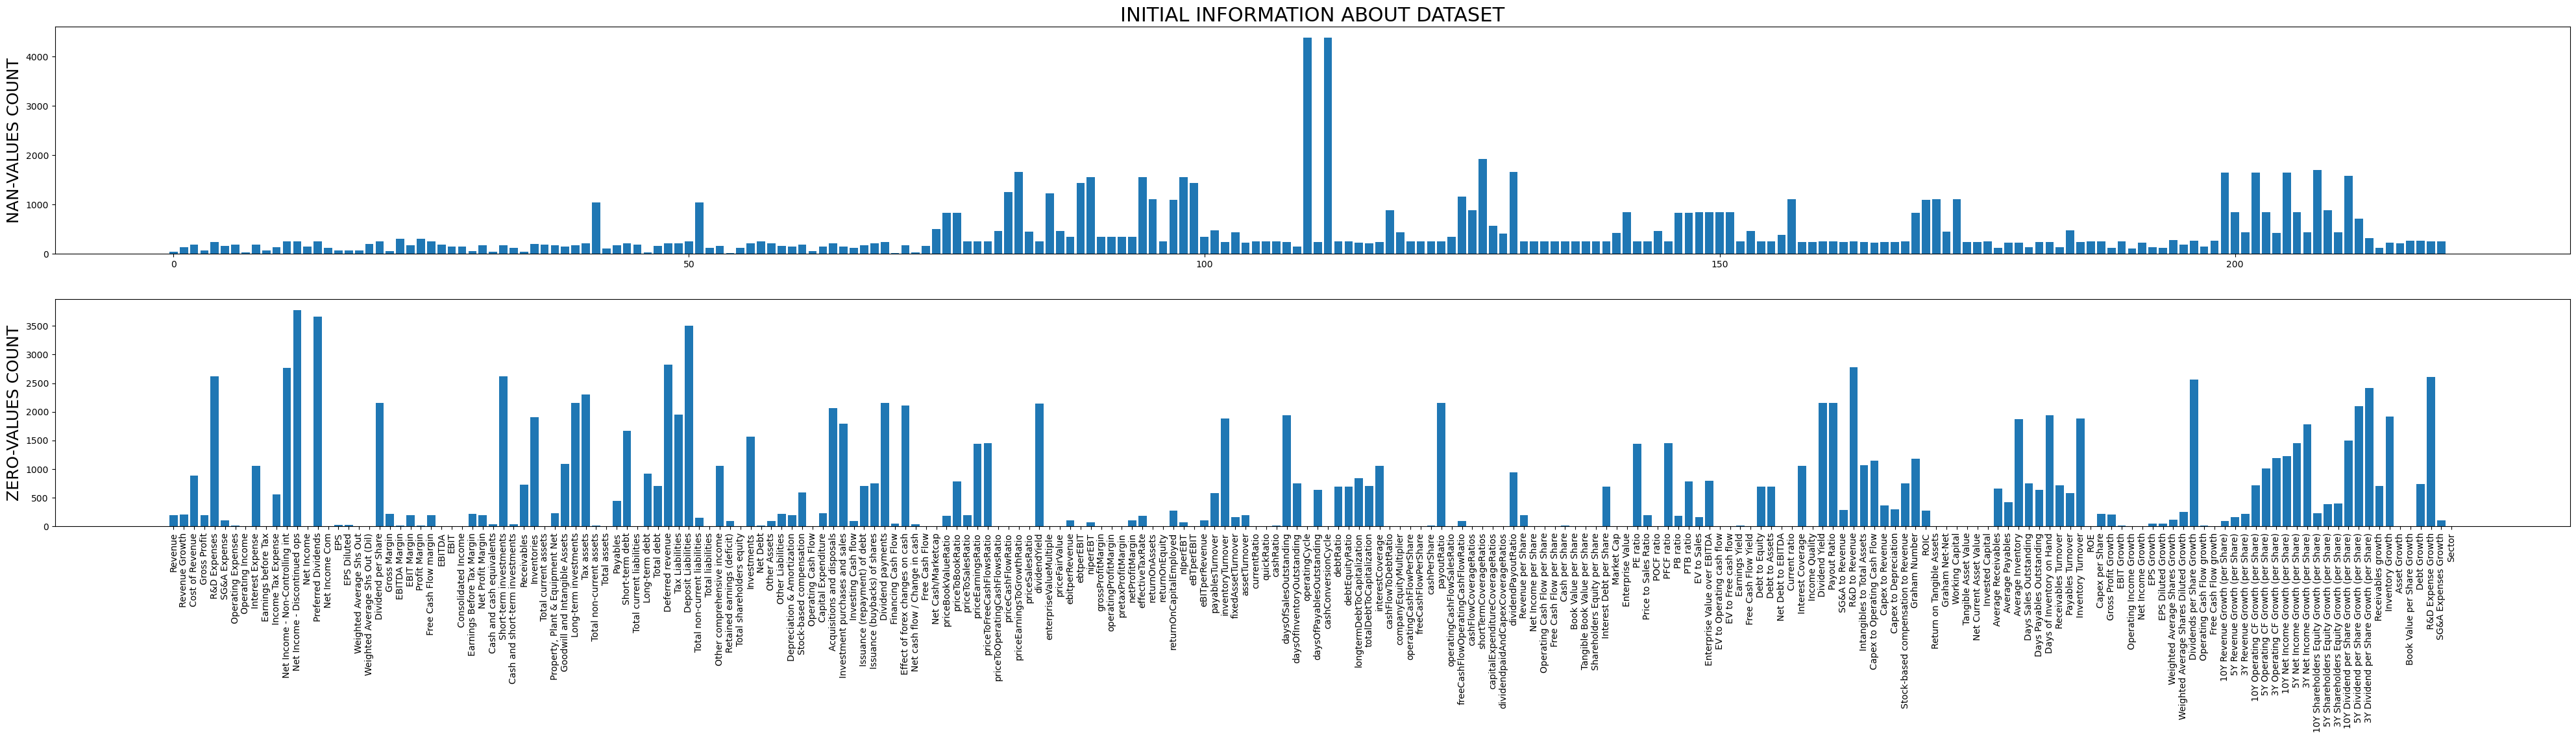

In [101]:
# Drop columns relative to classification, we will use them later
class_data = df.loc[:, ['Class', '2019 PRICE VAR [%]']]
df.drop(['Class', '2019 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = df.isna().sum()
zero_vals = df.isin([0]).sum()
ind = np.arange(df.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation=90)

plt.show()

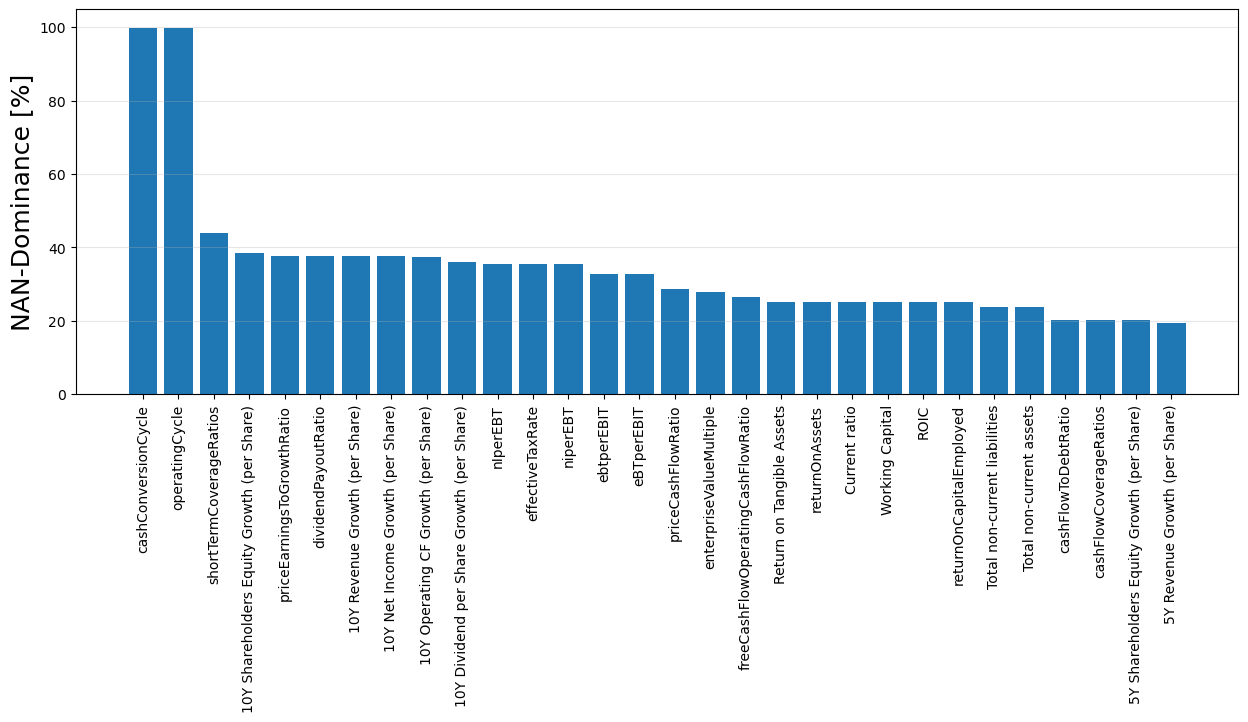

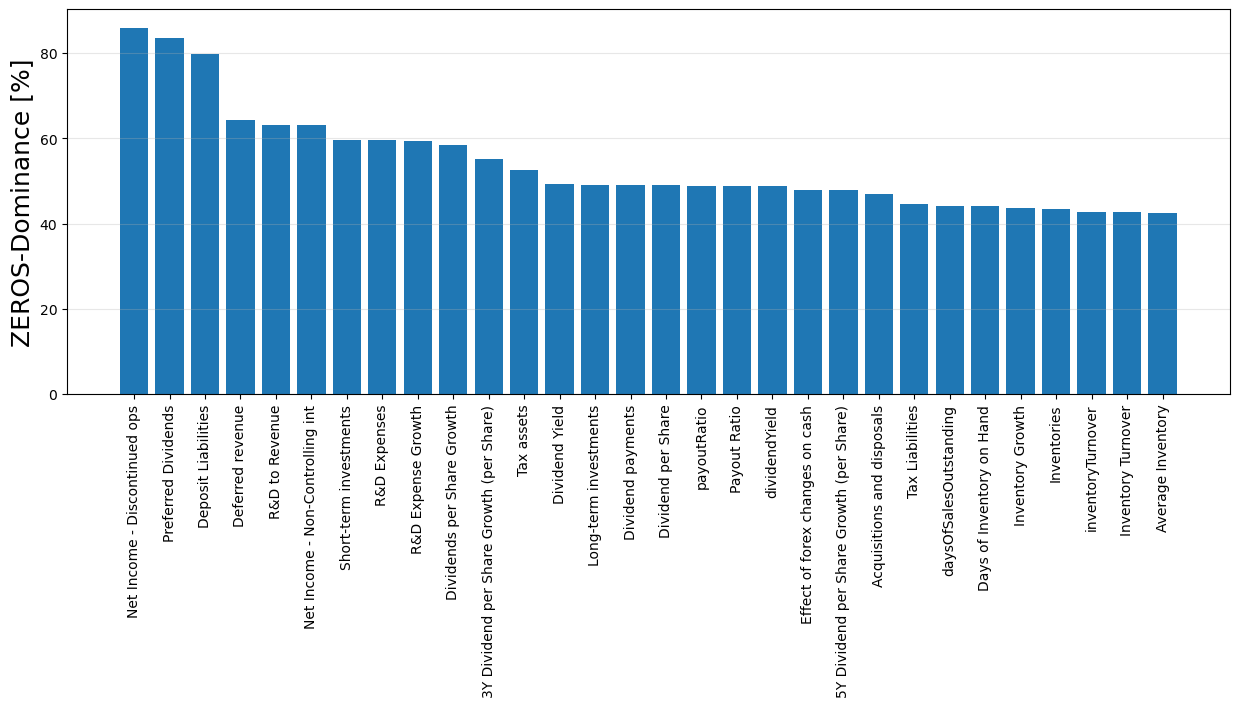

In [102]:
# Find count and percent of nan-values, zero-values
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation=90)
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation=90)
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [103]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      251.000000
Percent NaN      5.714936
Name: 0.5, dtype: float64
Total Zeros      282.600000
Percent Zeros      6.434426
Name: 0.6, dtype: float64


In [104]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {df.shape[1]}')
print()

df_test1 = df.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_test1.shape[1]}')
print()

df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, axis=1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')


INITIAL NUMBER OF VARIABLES: 222

NUMBER OF VARIABLES AFTER NaN THRESHOLD 5.71%: 122

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 6.43%: 62


In [105]:
# Check our filtered dataset
df_test2.describe()

,Revenue,Revenue Growth,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,...,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Asset Growth,SG&A Expenses Growth
count,4.346000e+03,4253.000000,4.328000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.321000e+03,4.241000e+03,4.275000e+03,4327.000000,...,4267.000000,4144.000000,4283.000000,4162.000000,4261.000000,4.267000e+03,4210.000000,4250.000000,4178.000000,4144.000000
mean,5.119287e+09,3.455278,2.043954e+09,9.005022e+08,1.435546e+09,6.541207e+08,5.584432e+08,4.473248e+08,4.483776e+08,-69.937477,...,2.085416,-1.687264,0.544211,1.424041,0.551279,9.299665e+03,0.459741,-5.267610,1.389013,0.153610
std,2.049504e+10,195.504906,7.682369e+09,3.661116e+09,5.529831e+09,2.969341e+09,2.639327e+09,2.118659e+09,2.103791e+09,5718.694086,...,212.798494,198.198971,20.218778,62.949132,13.157888,6.074462e+05,10.584789,283.022833,35.123904,0.839647
min,-6.894100e+07,-3.461500,-1.818220e+09,-1.401594e+08,-4.280000e+09,-1.455700e+10,-2.177200e+10,-2.235500e+10,-2.280200e+10,-359825.000000,...,-5536.483300,-12369.000000,-224.200000,-2036.750000,-332.000000,-3.320000e+02,-0.931700,-18001.000000,-0.999100,-1.000000
25%,6.501425e+07,0.000000,3.618903e+07,2.056226e+07,4.223644e+07,-5.510000e+06,-1.000800e+07,-1.065152e+07,-1.108050e+07,-0.390000,...,-0.011750,-0.242875,-0.245650,-0.379725,-0.324800,-3.219500e-01,-0.002575,-0.227675,-0.036700,-0.004650
50%,4.982640e+08,0.074900,2.219470e+08,9.390450e+07,1.806253e+08,4.203800e+07,2.730700e+07,2.365300e+07,2.335100e+07,0.690000,...,0.070800,0.085950,0.075100,0.148250,0.185700,1.863000e-01,0.008800,0.082200,0.034750,0.065700
75%,2.457878e+09,0.188500,9.767015e+08,4.117162e+08,6.796040e+08,2.862690e+08,2.238810e+08,1.962100e+08,1.971180e+08,2.310000,...,0.213300,0.445325,0.381700,0.684250,0.693300,6.905000e-01,0.090700,0.432775,0.160575,0.167625
max,5.003430e+11,12739.000000,1.269470e+11,1.065100e+11,1.065100e+11,7.089800e+10,7.290300e+10,5.953100e+10,5.953100e+10,101641.000000,...,12739.000000,2367.423100,886.989100,3159.000000,395.791700,3.967977e+07,627.712700,239.384600,1184.993800,43.718800


In [106]:
# Filter numeric columns
numeric_columns = df_test2.select_dtypes(include='number').columns

# Cut outliers
top_quantiles = df_test2[numeric_columns].quantile(0.97)
outliers_top = (df_test2[numeric_columns] > top_quantiles)

low_quantiles = df_test2[numeric_columns].quantile(0.03)
outliers_low = (df_test2[numeric_columns] < low_quantiles)

df_test2[numeric_columns] = df_test2[numeric_columns].mask(outliers_top, top_quantiles, axis=1)
df_test2[numeric_columns] = df_test2[numeric_columns].mask(outliers_low, low_quantiles, axis=1)

# Take a look at the dataframe post-outliers cut
df_test2.describe()

,Revenue,Revenue Growth,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,...,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Asset Growth,SG&A Expenses Growth
count,4.346000e+03,4253.000000,4.328000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.321000e+03,4.241000e+03,4.275000e+03,4327.000000,...,4267.000000,4144.000000,4283.000000,4162.000000,4261.000000,4267.000000,4210.000000,4250.000000,4178.000000,4144.000000
mean,3.437039e+09,0.135876,1.429547e+09,6.077564e+08,9.843496e+08,4.484311e+08,3.723641e+08,3.086147e+08,3.140187e+08,1.034458,...,0.147406,0.146257,0.074244,0.258234,0.261226,0.255111,0.108432,0.203863,0.111765,0.111833
std,7.342150e+09,0.303442,3.264442e+09,1.394325e+09,2.222997e+09,1.102630e+09,9.602493e+08,8.011006e+08,8.173095e+08,2.934576,...,0.403850,1.385822,1.222431,2.033596,1.841161,1.829999,0.265138,1.277640,0.315776,0.215611
min,0.000000e+00,-0.409488,0.000000e+00,8.908962e+05,4.198818e+06,-1.799788e+08,-2.262394e+08,-2.214994e+08,-2.224393e+08,-6.072000,...,-0.618410,-3.750816,-3.593516,-5.409136,-5.000000,-5.000000,-0.073892,-2.887477,-0.374966,-0.229113
25%,6.501425e+07,0.000000,3.618903e+07,2.056226e+07,4.223644e+07,-5.510000e+06,-1.000800e+07,-1.065152e+07,-1.108050e+07,-0.390000,...,-0.011750,-0.242875,-0.245650,-0.379725,-0.324800,-0.321950,-0.002575,-0.227675,-0.036700,-0.004650
50%,4.982640e+08,0.074900,2.219470e+08,9.390450e+07,1.806253e+08,4.203800e+07,2.730700e+07,2.365300e+07,2.335100e+07,0.690000,...,0.070800,0.085950,0.075100,0.148250,0.185700,0.186300,0.008800,0.082200,0.034750,0.065700
75%,2.457878e+09,0.188500,9.767015e+08,4.117162e+08,6.796040e+08,2.862690e+08,2.238810e+08,1.962100e+08,1.971180e+08,2.310000,...,0.213300,0.445325,0.381700,0.684250,0.693300,0.690500,0.090700,0.432775,0.160575,0.167625
max,3.366963e+10,1.248900,1.596702e+10,6.754875e+09,1.091602e+10,5.184200e+09,4.463000e+09,3.741000e+09,3.812582e+09,8.785400,...,1.631718,4.491038,3.719290,7.155169,6.343560,6.250714,1.225250,4.595985,1.234026,0.811407


In [107]:
# Replace nan-values with mean value of column's sector
for column in df_test2.select_dtypes(include=[np.number]).columns:
    df_test2[column] = df_test2.groupby('Sector')[column].transform(lambda x: x.fillna(x.mean()))

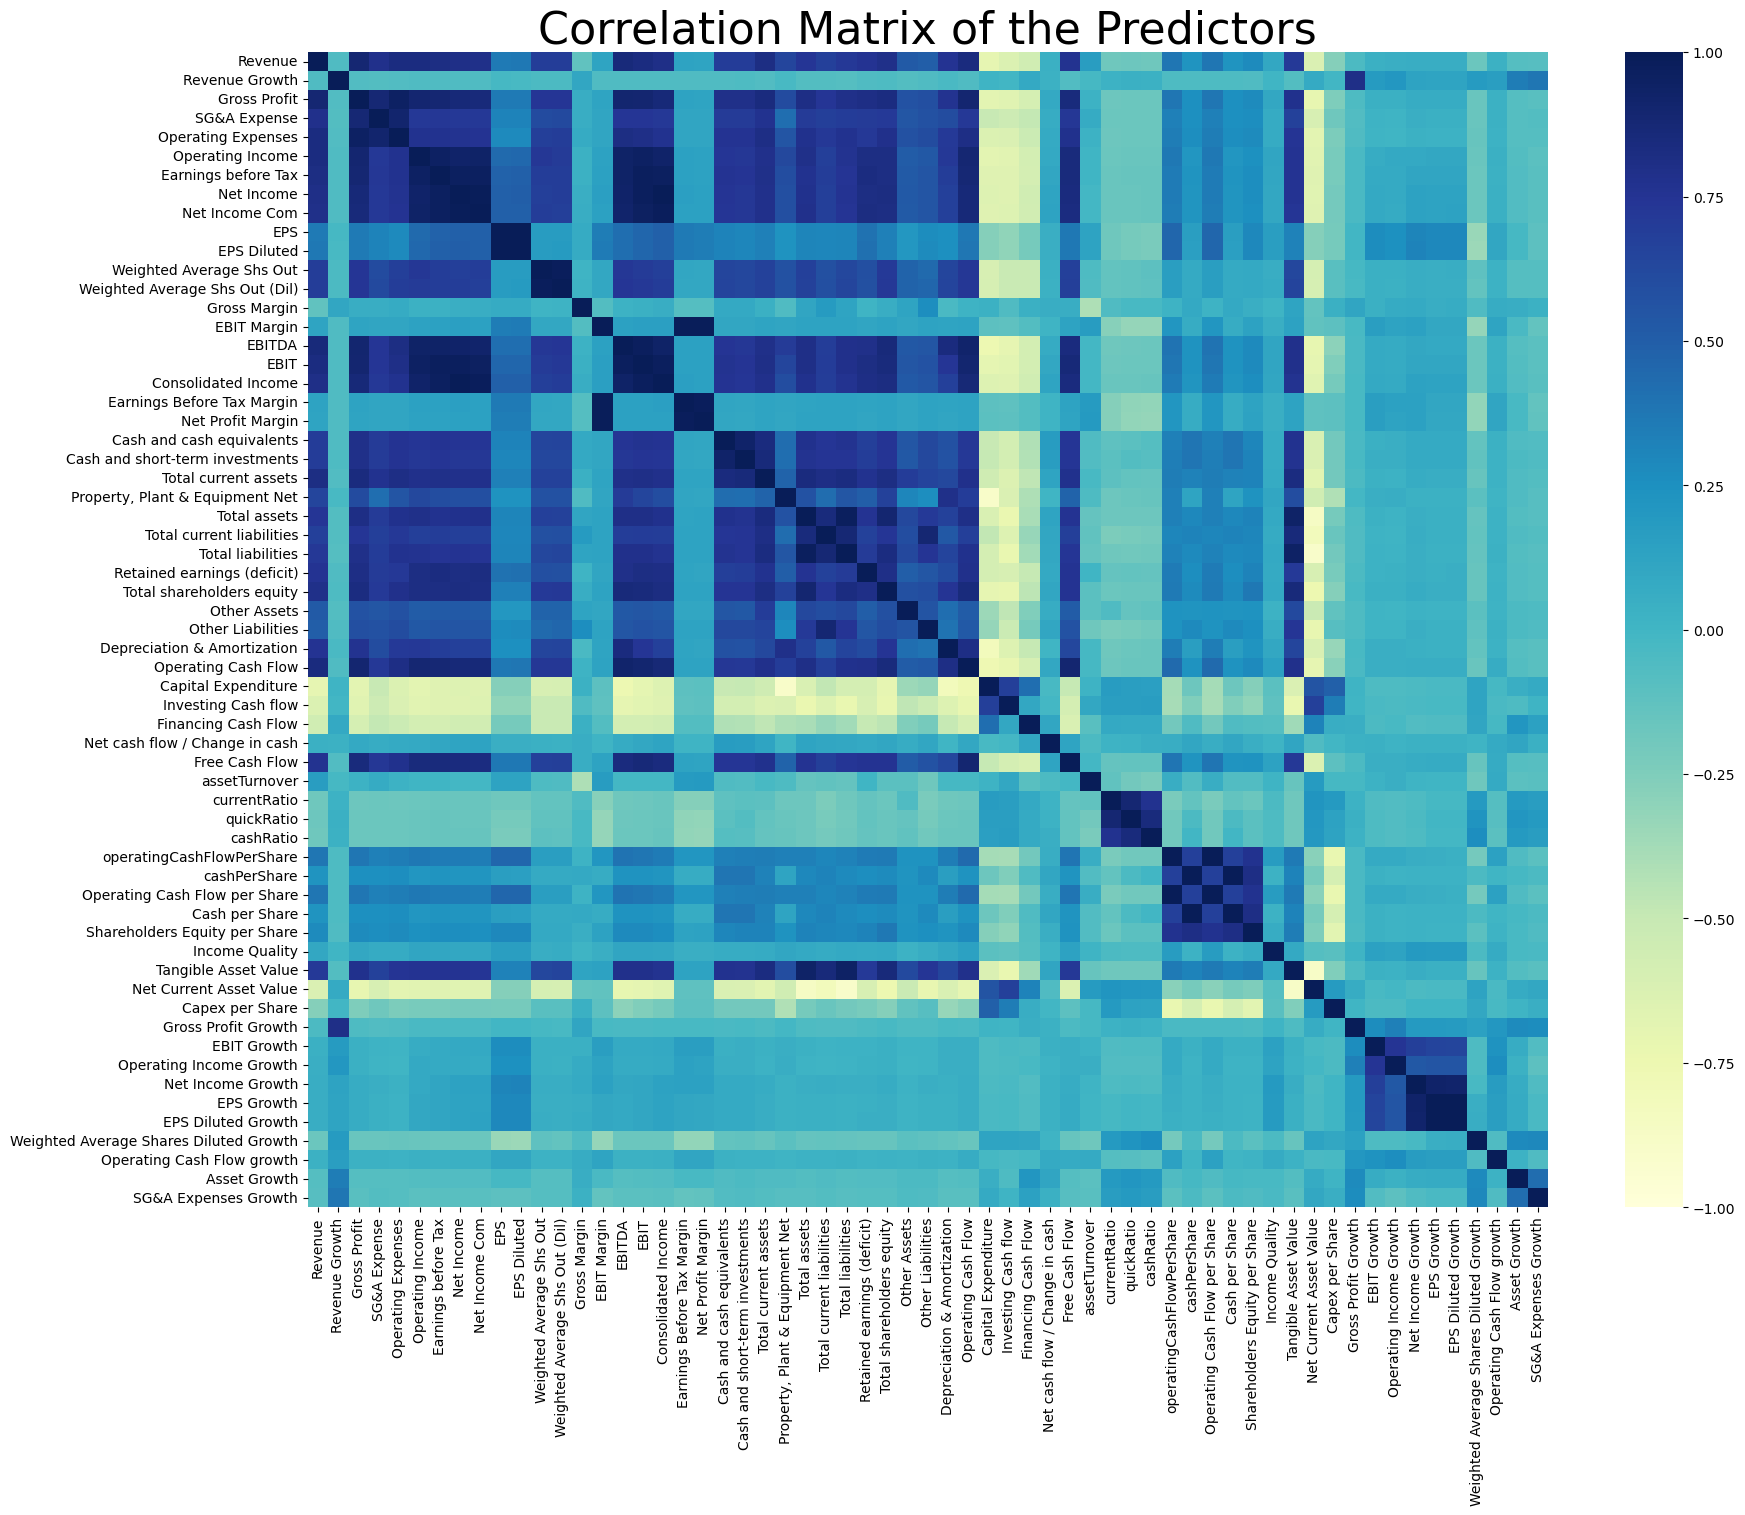

In [108]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_test2.select_dtypes(include=[np.number]).corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title("Correlation Matrix of the Predictors", fontsize=32)
plt.show()

In [109]:
# Add the sector column
df_out = df_test2.join(df['Sector'], rsuffix='_right')

# Add back the classification columns
df_out = df_out.join(class_data)

# Print information about dataset
df_out.info()
df_out.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, CMCSA to ZYME
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Revenue                                 4392 non-null   float64
 1   Revenue Growth                          4392 non-null   float64
 2   Gross Profit                            4392 non-null   float64
 3   SG&A Expense                            4392 non-null   float64
 4   Operating Expenses                      4392 non-null   float64
 5   Operating Income                        4392 non-null   float64
 6   Earnings before Tax                     4392 non-null   float64
 7   Net Income                              4392 non-null   float64
 8   Net Income Com                          4392 non-null   float64
 9   EPS                                     4392 non-null   float64
 10  EPS Diluted                             4392 non-null   float

,Revenue,Revenue Growth,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,...,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Asset Growth,SG&A Expenses Growth,Class,2019 PRICE VAR [%]
count,4.392000e+03,4392.000000,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4392.000000,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,3.431959e+09,0.135713,1.429657e+09,6.163775e+08,9.916391e+08,4.489758e+08,3.731335e+08,3.120485e+08,3.171267e+08,1.041199,...,0.075624,0.267142,0.261734,0.255610,0.107855,0.205875,0.110839,0.110807,0.693534,20.803948
std,7.304752e+09,0.298810,3.241932e+09,1.368804e+09,2.177880e+09,1.098418e+09,9.526861e+08,7.875406e+08,8.066353e+08,2.914112,...,1.207550,1.980463,1.813650,1.803908,0.259936,1.257163,0.308045,0.209506,0.461078,82.622147
min,0.000000e+00,-0.409488,0.000000e+00,8.908962e+05,4.198818e+06,-1.799788e+08,-2.262394e+08,-2.214994e+08,-2.224393e+08,-6.072000,...,-3.593516,-5.409136,-5.000000,-5.000000,-0.073892,-2.887477,-0.374966,-0.229113,0.000000,-99.864779
25%,6.584545e+07,0.000000,3.737700e+07,2.170000e+07,4.624375e+07,-5.199308e+06,-9.525389e+06,-9.446438e+06,-1.041550e+07,-0.372250,...,-0.230650,-0.330750,-0.293425,-0.290675,-0.001400,-0.211250,-0.032200,0.000000,0.000000,-7.477173
50%,5.200504e+08,0.078492,2.384675e+08,1.040695e+08,2.017610e+08,4.366150e+07,2.967350e+07,2.867850e+07,2.708496e+07,0.720000,...,0.080700,0.183050,0.198759,0.197900,0.010900,0.099300,0.042850,0.073350,1.000000,17.639393
75%,2.577958e+09,0.184950,1.025554e+09,5.037902e+08,7.931652e+08,2.963250e+08,2.397000e+08,2.479838e+08,2.345292e+08,2.280000,...,0.375725,0.637225,0.670825,0.673200,0.094068,0.420825,0.147400,0.156400,1.000000,39.625879
max,3.366963e+10,1.248900,1.596702e+10,6.754875e+09,1.091602e+10,5.184200e+09,4.463000e+09,3.741000e+09,3.812582e+09,8.785400,...,3.719290,7.155169,6.343560,6.250714,1.225250,4.595985,1.234026,0.811407,1.000000,3756.716345


In [110]:
print(df_out.columns)
print(len(df_out.columns))

Index(['Revenue', 'Revenue Growth', 'Gross Profit', 'SG&A Expense',
       'Operating Expenses', 'Operating Income', 'Earnings before Tax',
       'Net Income', 'Net Income Com', 'EPS', 'EPS Diluted',
       'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)',
       'Gross Margin', 'EBIT Margin', 'EBITDA', 'EBIT', 'Consolidated Income',
       'Earnings Before Tax Margin', 'Net Profit Margin',
       'Cash and cash equivalents', 'Cash and short-term investments',
       'Total current assets', 'Property, Plant & Equipment Net',
       'Total assets', 'Total current liabilities', 'Total liabilities',
       'Retained earnings (deficit)', 'Total shareholders equity',
       'Other Assets', 'Other Liabilities', 'Depreciation & Amortization',
       'Operating Cash Flow', 'Capital Expenditure', 'Investing Cash flow',
       'Financing Cash Flow', 'Net cash flow / Change in cash',
       'Free Cash Flow', 'assetTurnover', 'currentRatio', 'quickRatio',
       'cashRatio', 'operatin

# Feature Selection

After taking care of data missingness and outliers, we are left with 65 columns, out of which 61 are financial indicators (and thus predictors). However, many of these predictors are highly correlated, so we further cut the number of predictors using feature selection.

First, we grouped features by features that are correlated by more than 0.90, and kept only one feature out of each of these groups to reduce redundancy. This left us with 41 predictors. 

Then, we plotted boxplots of the leftover features by class (increase or decrease of stocks). Through the observation of these boxplots, as well as personal understanding of financial indicators and which indicators are similar or significant, we further narrowed down the number of features to the following 16:

- 'Revenue': The total amount of income generated by the sale of goods or services related to the company's primary operations.
- 'Revenue Growth': The increase (or decrease) in a company's sales from one period to the next.
- 'Operating Income': The profit realized from a business's operations, after deducting operating expenses such as wages, depreciation, and cost of goods sold (COGS).
- 'EPS': Earnings per share (EPS) is the portion of a company's profit allocated to each outstanding share of common stock.
- 'Gross Margin': Gross margin is the difference between revenue and cost of goods sold (COGS), divided by revenue.
- 'EBIT Margin': Earnings before interest and taxes (EBIT) margin is a profitability ratio that measures earnings before interest and tax expenses as a percentage of total revenue.
- 'Total current assets': The total amount of assets that a company can convert into cash within one year.
- 'Total current liabilities': The total amount of liabilities due within the next year.
- 'Total shareholders equity': The net value of a company, calculated by total assets minus total liabilities.
- 'Investing Cash flow': The amount of cash generated or spent on investments like new equipment or investments in securities.
- 'Free Cash Flow': The cash a company generates after accounting for cash outflows to support operations and maintain its capital assets.
- 'currentRatio': A liquidity ratio that measures a company's ability to pay short-term obligations.
- 'Shareholders Equity per Share': A measure of a company's net value per share. Calculated as total shareholder's equity divided by the total number of outstanding shares.
- 'Gross Profit Growth': The growth in the company's gross profit from one period to the next.
- 'EBIT Growth': The growth in the company's earnings before interest and taxes (EBIT) from one period to the next.
- 'Operating Cash Flow growth': The growth in the cash generated by the company's regular operating activities from one period to the next.

In [111]:
# Select only numeric columns for correlation matrix
numeric_df_out = df_out.select_dtypes(include=[np.number])
correlation_matrix = numeric_df_out.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Keep one feature from each group of highly correlated features
for group in to_drop:
    if isinstance(group, list):
        group.remove(group[0])

# Drop the remaining highly correlated features 
df_out = df_out.drop(df_out[to_drop], axis=1)

In [112]:
for column in to_drop:
    correlated = upper[upper[column] > 0.90].index.tolist()
    print(f"Dropped {column}, which was highly correlated with: {correlated}")

Dropped Operating Expenses, which was highly correlated with: ['Gross Profit', 'SG&A Expense']
Dropped Earnings before Tax, which was highly correlated with: ['Operating Income']
Dropped Net Income, which was highly correlated with: ['Operating Income', 'Earnings before Tax']
Dropped Net Income Com, which was highly correlated with: ['Operating Income', 'Earnings before Tax', 'Net Income']
Dropped EPS Diluted, which was highly correlated with: ['EPS']
Dropped Weighted Average Shs Out (Dil), which was highly correlated with: ['Weighted Average Shs Out']
Dropped EBITDA, which was highly correlated with: ['Gross Profit', 'Operating Income', 'Earnings before Tax', 'Net Income', 'Net Income Com']
Dropped EBIT, which was highly correlated with: ['Operating Income', 'Earnings before Tax', 'Net Income', 'Net Income Com', 'EBITDA']
Dropped Consolidated Income, which was highly correlated with: ['Operating Income', 'Earnings before Tax', 'Net Income', 'Net Income Com', 'EBITDA', 'EBIT']
Dropped 

In [113]:
print(df_out.columns)
print(len(df_out.columns))

Index(['Revenue', 'Revenue Growth', 'Gross Profit', 'SG&A Expense',
       'Operating Income', 'EPS', 'Weighted Average Shs Out', 'Gross Margin',
       'EBIT Margin', 'Cash and cash equivalents', 'Total current assets',
       'Property, Plant & Equipment Net', 'Total assets',
       'Total current liabilities', 'Retained earnings (deficit)',
       'Total shareholders equity', 'Other Assets', 'Other Liabilities',
       'Depreciation & Amortization', 'Capital Expenditure',
       'Investing Cash flow', 'Financing Cash Flow',
       'Net cash flow / Change in cash', 'Free Cash Flow', 'assetTurnover',
       'currentRatio', 'quickRatio', 'cashRatio', 'operatingCashFlowPerShare',
       'cashPerShare', 'Shareholders Equity per Share', 'Income Quality',
       'Capex per Share', 'Gross Profit Growth', 'EBIT Growth',
       'Operating Income Growth', 'Net Income Growth',
       'Weighted Average Shares Diluted Growth', 'Operating Cash Flow growth',
       'Asset Growth', 'SG&A Expenses Gr

/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sabrina/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

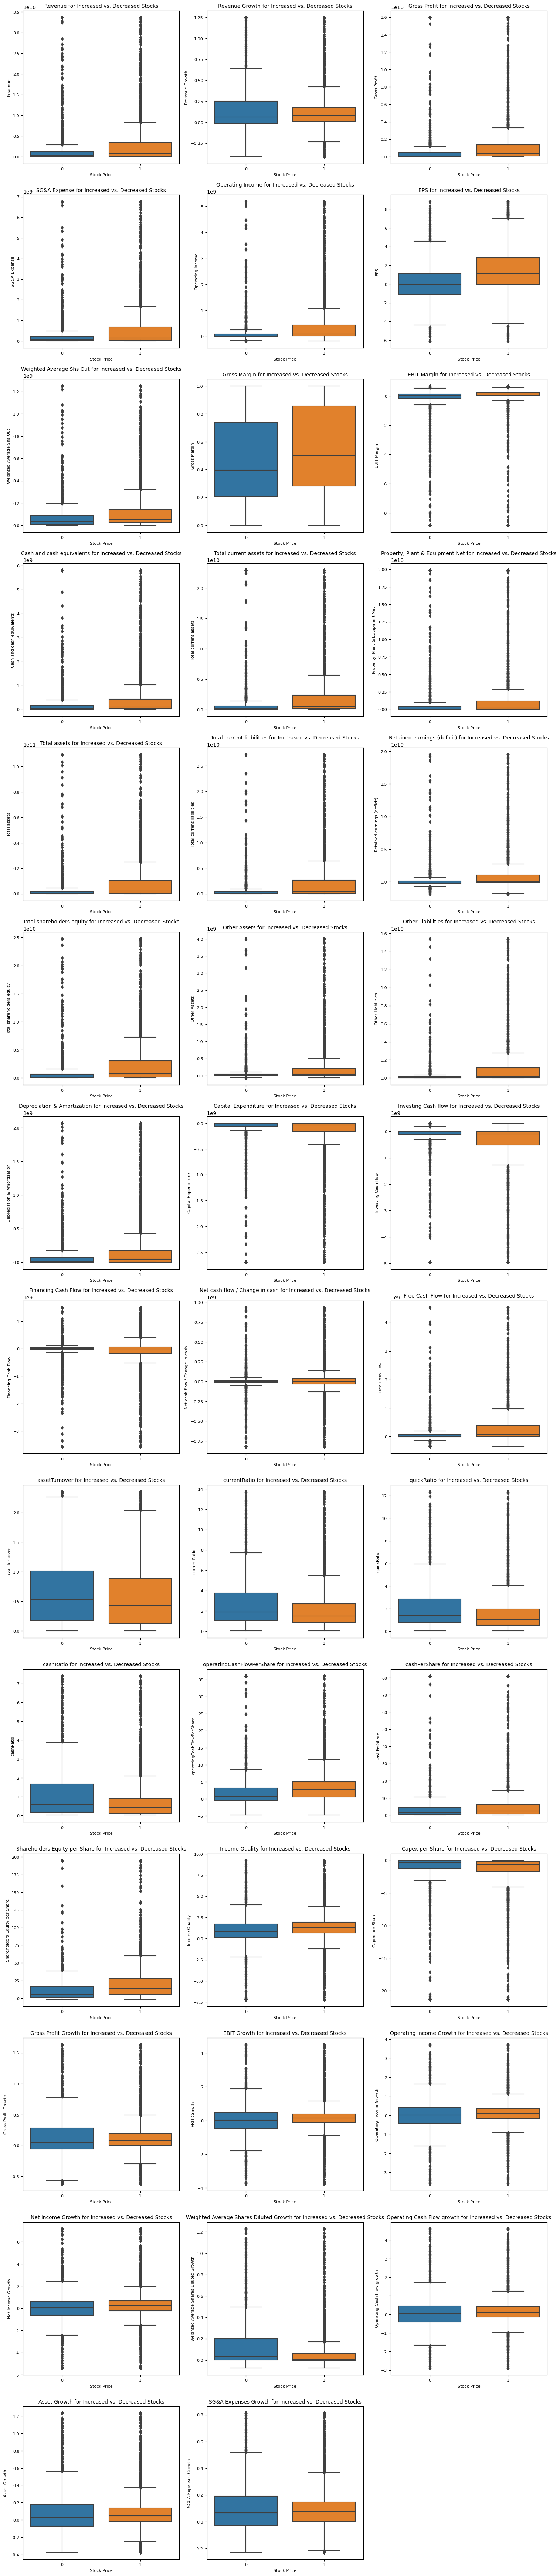

In [114]:
# Select only numeric columns for boxplot
numeric_df_out = df_out.select_dtypes(include=[np.number])
numeric_df_out = numeric_df_out.drop(columns=['2019 PRICE VAR [%]', 'Class'])  # Exclude '2019 PRICE VAR [%]' and 'Class'

features = numeric_df_out.columns.tolist()

# Calculate number of rows needed for subplots
n_rows = len(features) // 3 if len(features) % 3 == 0 else len(features) // 3 + 1

fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
axs = axs.ravel()

for i, feature in enumerate(features):
    sns.boxplot(x='Class', y=feature, data=df_out, ax=axs[i])
    axs[i].set_title(f'{feature} for Increased vs. Decreased Stocks', fontsize=10)
    axs[i].set_xlabel('Stock Price', fontsize=8)
    axs[i].set_ylabel(feature, fontsize=8)
    axs[i].tick_params(axis='x', labelsize=8)
    axs[i].tick_params(axis='y', labelsize=8)

# Remove unused subplots
if len(features) % 3 != 0:
    for i in range(len(features), n_rows * 3):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [122]:
features = ['Revenue', 'Revenue Growth', 'Operating Income', 'EPS', 'Gross Margin', 'EBIT Margin', 'Total current assets', 'Total current liabilities', 'Total shareholders equity', 'Investing Cash flow', 'Free Cash Flow', 'currentRatio', 'Shareholders Equity per Share', 'Gross Profit Growth', 'EBIT Growth', 'Operating Cash Flow growth']

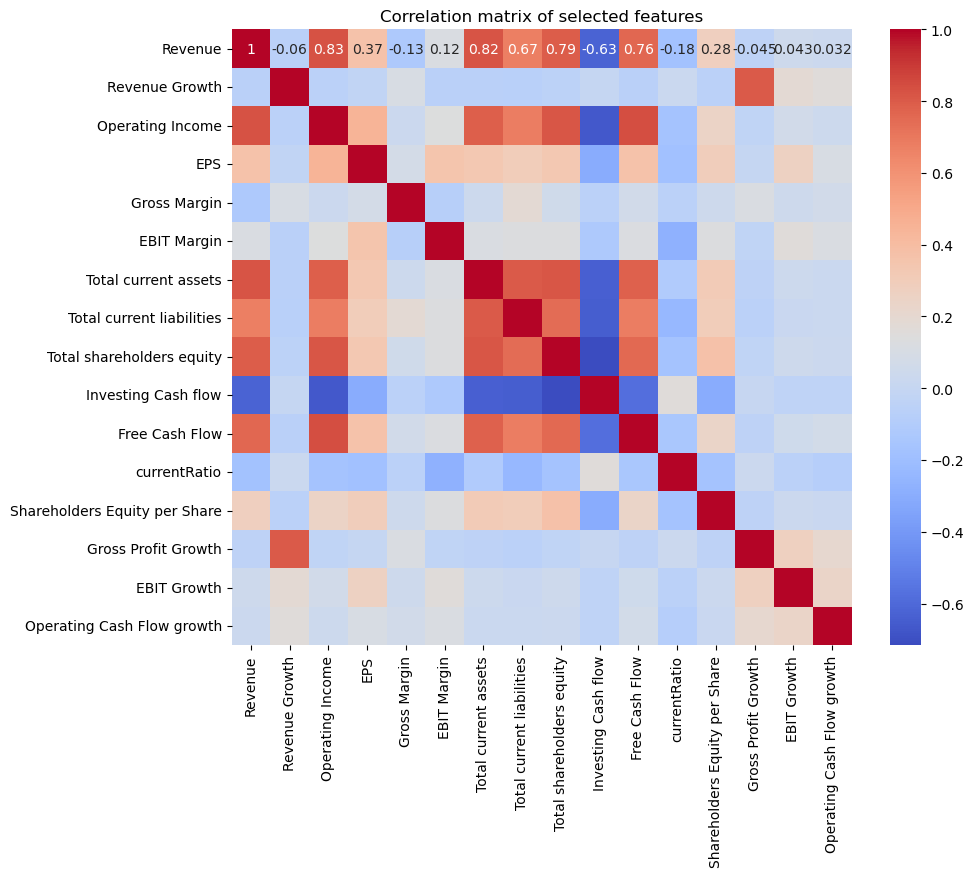

In [123]:
correlation_matrix = df_out[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of selected features')
plt.show()

In [135]:
selected_features_df = df_out[features]

In [136]:
selected_features_df.head()

,Revenue,Revenue Growth,Operating Income,EPS,Gross Margin,EBIT Margin,Total current assets,Total current liabilities,Total shareholders equity,Investing Cash flow,Free Cash Flow,currentRatio,Shareholders Equity per Share,Gross Profit Growth,EBIT Growth,Operating Cash Flow growth
CMCSA,3.366963e+10,0.1115,5.184200e+09,2.5600,1.0000,0.1974,2.184800e+10,2.716638e+10,2.471735e+10,-4.962052e+09,4.529112e+09,0.792000,15.7408,0.1115,0.0220,0.1428
KMI,1.414400e+10,0.0320,3.794000e+09,0.6600,0.4847,0.2908,5.722000e+09,7.557000e+09,2.471735e+10,-6.800000e+07,2.119000e+09,0.757000,15.1977,0.0564,0.0405,0.0961
INTC,3.366963e+10,0.1289,5.184200e+09,4.5700,0.6173,0.3273,2.291278e+10,1.662600e+10,2.471735e+10,-4.962052e+09,4.529112e+09,1.731000,16.1707,0.1187,0.1203,0.3312
MU,3.039100e+10,0.4955,5.184200e+09,8.7854,0.5887,0.4819,1.603900e+10,5.754000e+09,2.471735e+10,-4.962052e+09,4.529112e+09,2.787000,28.0330,1.1208,1.5233,1.1342
GE,3.366963e+10,0.0285,-1.799788e+08,-2.6200,0.2151,-0.1374,2.291278e+10,2.716638e+10,2.471735e+10,3.130250e+08,7.090000e+08,1.718208,3.5618,0.7216,-1.6844,-0.2961


# Baseline Model

First, let us fit a logistic regression model to predict whether a stock will increase or decrease from revenue alone.

In [137]:
X = df_out[features]
y = df_out['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
# Fit the logistic regression model
logit1 = LogisticRegression()
logit1.fit(X_train[['Revenue']], y_train)

# Store the learned parameters
logit1_beta0 = logit1.intercept_[0]
logit1_beta1 = logit1.coef_[0][0]

# Predict on the train and test sets
y_train_pred = logit1.predict(X_train[['Revenue']])
y_test_pred = logit1.predict(X_test[['Revenue']])

# Calculate and store the train and test classification accuracies
acc_train_logit1 = accuracy_score(y_train, y_train_pred)
acc_test_logit1 = accuracy_score(y_test, y_test_pred)

In [141]:
print("Learned Parameters:")
print("Intercept: ", logit1_beta0)
print("Coefficient: ", logit1_beta1)
print("\nClassification Accuracies:")
print("Train Accuracy: ", acc_train_logit1)
print("Test Accuracy: ", acc_test_logit1)

Learned Parameters:
Intercept:  2.6749427288409396e-19
Coefficient:  1.1517404119857235e-10

Classification Accuracies:
Train Accuracy:  0.6945630515229149
Test Accuracy:  0.689419795221843


Next, let us fit a logistic regression model predicting stock increase or decrease with just 'Revenue' and 'EPS'.

In [143]:
# Fit the logistic regression model with 'Revenue' and 'EPS'
logit2 = LogisticRegression()
logit2.fit(X_train[['Revenue', 'EPS']], y_train)

# Store the learned parameters
logit2_beta0 = logit2.intercept_[0]
logit2_beta1, logit2_beta2 = logit2.coef_[0]

# Predict on the train and test sets
y_train_pred2 = logit2.predict(X_train[['Revenue', 'EPS']])
y_test_pred2 = logit2.predict(X_test[['Revenue', 'EPS']])

# Calculate and store the train and test classification accuracies
acc_train_logit2 = accuracy_score(y_train, y_train_pred2)
acc_test_logit2 = accuracy_score(y_test, y_test_pred2)

print("Learned Parameters:")
print("Intercept: ", logit2_beta0)
print("Coefficient for Revenue: ", logit2_beta1)
print("Coefficient for Revenue Growth: ", logit2_beta2)
print("\nClassification Accuracies:")
print("Train Accuracy: ", acc_train_logit2)
print("Test Accuracy: ", acc_test_logit2)

Learned Parameters:
Intercept:  2.6749427288426046e-19
Coefficient for Revenue:  1.1517404119857249e-10
Coefficient for Revenue Growth:  7.1411856671072815e-19

Classification Accuracies:
Train Accuracy:  0.694847708511244
Test Accuracy:  0.7030716723549488


Next, let's fit a logistic regression model predicting stock increase or decrease with all 16 features.

In [144]:
logit3 = LogisticRegression()
logit3.fit(X_train, y_train)

# Store the learned parameters
logit3_beta = logit3.coef_[0]
logit3_intercept = logit3.intercept_[0]

# Predict on the train and test sets
y_train_pred3 = logit3.predict(X_train)
y_test_pred3 = logit3.predict(X_test)

# Calculate and store the train and test classification accuracies
acc_train_logit3 = accuracy_score(y_train, y_train_pred3)
acc_test_logit3 = accuracy_score(y_test, y_test_pred3)

print("Learned Parameters:")
print("Intercept: ", logit3_intercept)
print("Coefficients: ", logit3_beta)
print("\nClassification Accuracies:")
print("Train Accuracy: ", acc_train_logit3)
print("Test Accuracy: ", acc_test_logit3)

Learned Parameters:
Intercept:  1.6930733879441658e-17
Coefficients:  [-5.95283438e-12  1.37345471e-18  1.49351650e-10  4.79993694e-17
  1.02533106e-17  1.14224253e-17  3.89873690e-11  1.43132710e-10
  1.56296457e-11 -2.44214154e-10  9.67018291e-11  3.76731969e-17
  2.12014407e-16  1.93603326e-18  5.20111321e-18  4.42590757e-18]

Classification Accuracies:
Train Accuracy:  0.7136350697409621
Test Accuracy:  0.6905574516496018


Next, we scaled our predictors, so that we can weight our parameters similarly in future models.

In [145]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Next, we fit a well-tuned $k$-NN classification model with main effects of all 16 predictors in it, using 10-fold cross-validation with classification accuracy as the scoring metric. After trying many $k$ values, we plot the training and validation scores of the model at each value of $k$, and then chose the $k$ with the validation accuracy.

In [149]:
ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]
mean_train_scores = []
mean_val_scores = []

for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
    mean_train_scores.append(scores.mean())

    knn_model.fit(X_train, y_train)
    val_score = knn_model.score(X_test, y_test)
    mean_val_scores.append(val_score)

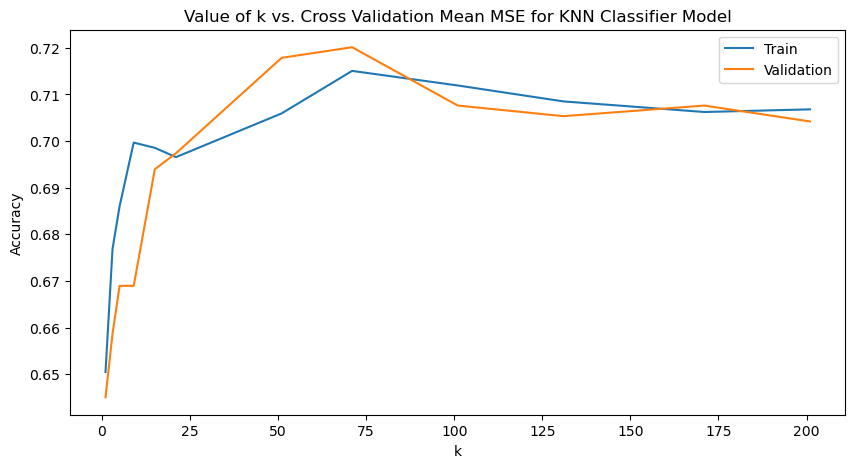

In [152]:
# Plotting the scores
plt.figure(figsize=(10, 5))
plt.plot(ks, mean_train_scores, label='Train')
plt.plot(ks, mean_val_scores, label='Validation')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title("Value of k vs. Cross Validation Mean MSE for KNN Classifier Model")
plt.legend()
plt.show()

In [153]:
# Storing the best k and the classification accuracy on train and test
best_k = ks[mean_val_scores.index(max(mean_val_scores))]
knn_train_acc = max(mean_train_scores)
knn_test_acc = max(mean_val_scores)

In [154]:
print(f"Best k: {best_k}")
print(f"Train accuracy: {knn_train_acc}")
print(f"Test accuracy: {knn_test_acc}")

Best k: 71
Train accuracy: 0.7150592463092463
Test accuracy: 0.7201365187713311
